# Sequence feature analysis - Beta chain - from paired chain data

## Module imports and figure formatting

In [18]:
import pandas as pd
import numpy as np

#Pyrepseq imports
import pyrepseq as prs
import pyrepseq.plotting as rsp
import pyrepseq.distance as rsd
import pyrepseq.stats as rss

#Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style 
import matplotlib as mpl 
import seaborn as sns


from matplotlib.colors import LogNorm, Normalize

from tcrpc.tcrpc_src import pc_grouped

In [38]:
#Set default plotting parameters
mpl.rcParams['figure.figsize'] = [4.0, 4.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=500 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Data imports

### VDJdb -specific 

In [20]:
vdjdb = pd.read_csv('../data/vdjdb/vdjdb_paired_human_preprocessed.csv',sep=',')

vdjdb = vdjdb.dropna(axis=0, subset = ["CDR3B", "TRBV", "TRBJ"] ).reset_index().drop("index", axis=1)

### Tanno -background

In [21]:
tanno = pd.read_csv('../data/tanno/preprocessed/combined.csv',sep=',')
tanno = tanno.dropna(axis=0, subset = ["CDR3B", "TRBV", "TRBJ"] ).reset_index().drop("index", axis=1)

## Relevance of each sequence feature

In [22]:
#Individual relevance 
h_v_back = -np.log2(rss.pc(tanno['TRBV']))
h_j_back = -np.log2(rss.pc(tanno['TRBJ']))
h_cdr3_back = -np.log2(rss.pc(tanno['CDR3B']))

h_v_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBV"]))
h_j_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBJ"]))
h_cdr3_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3B"]))


#Joint relevance
h_vcdr3_back = -np.log2(rss.pc(tanno['TRBV']+tanno['CDR3B']))
h_jcdr3_back = -np.log2(rss.pc(tanno['TRBJ']+tanno['CDR3B']))
h_vj_back = -np.log2(rss.pc(tanno['TRBV']+tanno['TRBJ']))

h_vcdr3_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBV","CDR3B"]))
h_jcdr3_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBJ","CDR3B"]))
h_vj_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBV","TRBJ"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encou

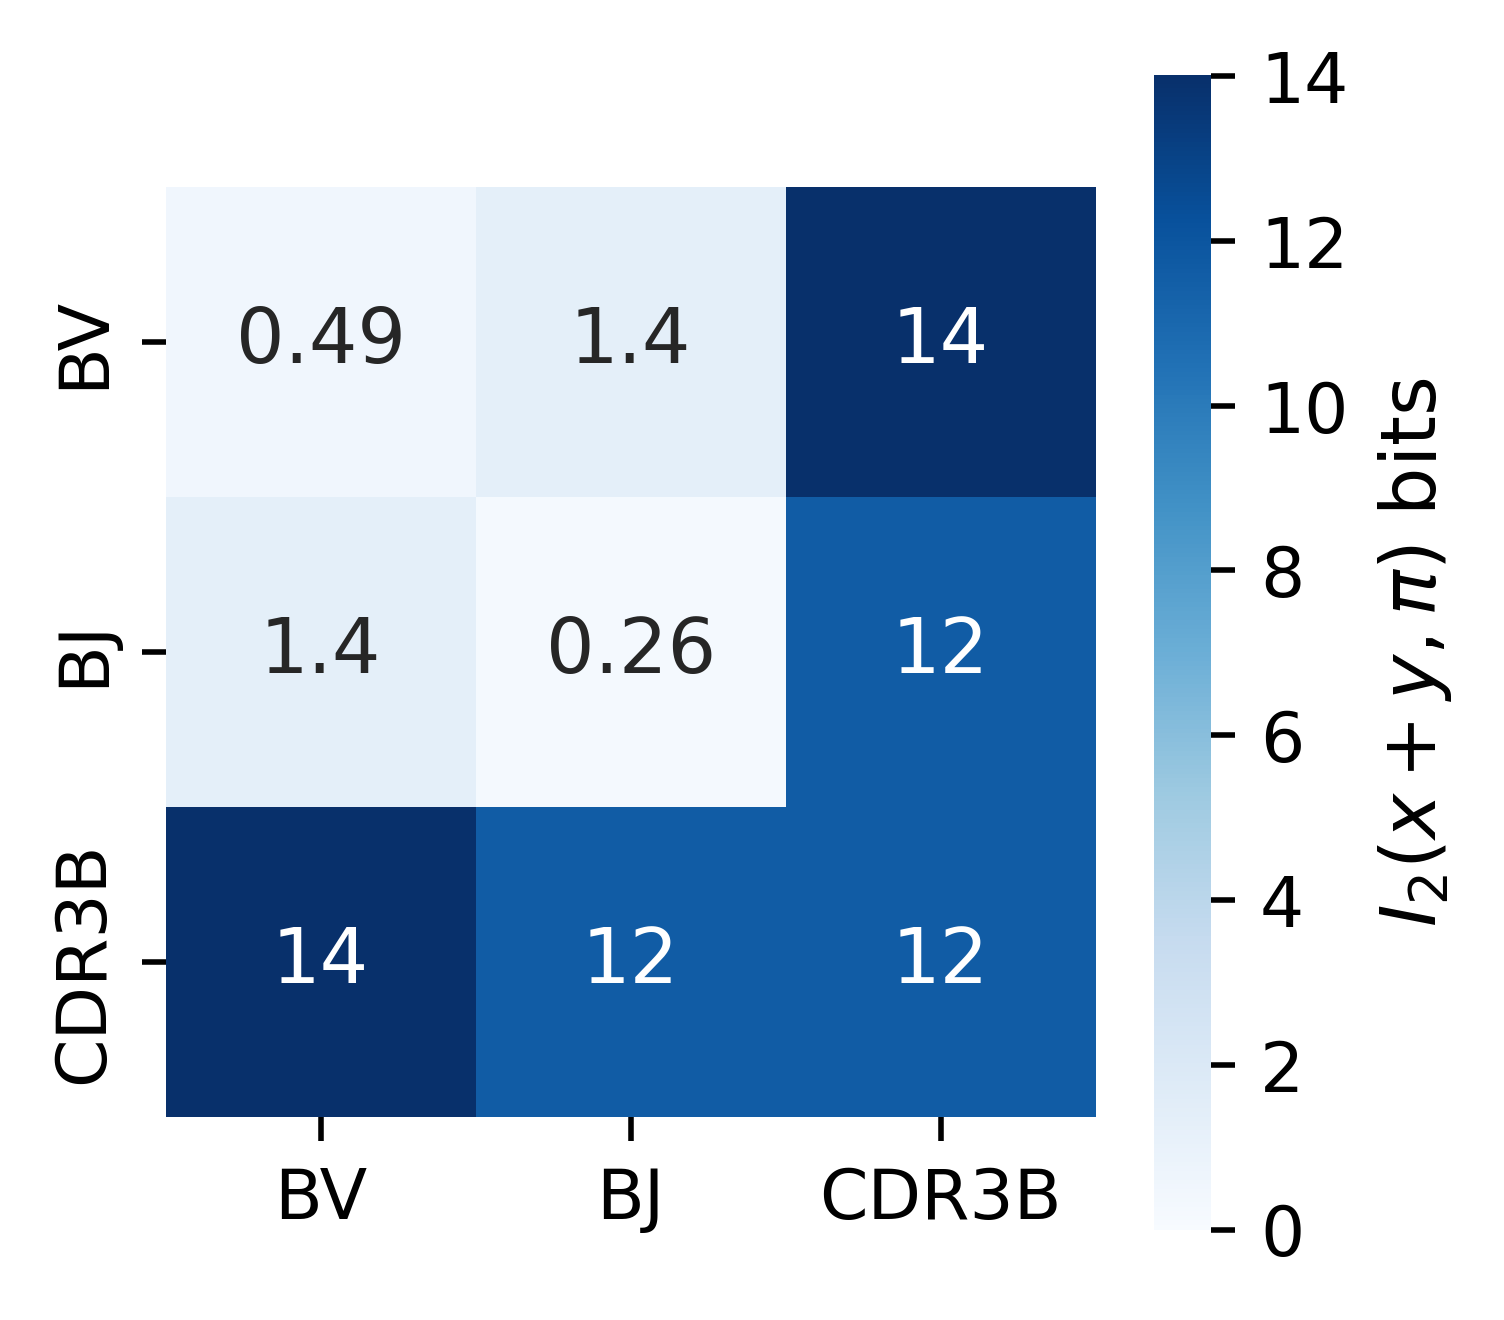

In [26]:
array = [
    [h_v_back-h_v_spc, h_vj_back-h_vj_spc,h_vcdr3_back-h_vcdr3_spc],
    [h_vj_back-h_vj_spc, h_j_back-h_j_spc,h_jcdr3_back-h_jcdr3_spc],
    [h_vcdr3_back-h_vcdr3_spc, h_jcdr3_back-h_jcdr3_spc,h_cdr3_back-h_cdr3_spc]
]

df_mi = pd.DataFrame(array, index=["BV", "BJ", "CDR3B"], columns=["BV", "BJ", "CDR3B"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x+y, \pi)$ bits'},vmin=0,annot=True)
ax.set_facecolor('xkcd:black')
plt.savefig('betaRelevance.png');

## Feature synergy

In [7]:
syn_vcdr3 = (h_vcdr3_back-h_vcdr3_spc) - (h_cdr3_back-h_cdr3_spc) - (h_v_back-h_v_spc)
syn_jcdr3 = (h_jcdr3_back-h_jcdr3_spc) - (h_cdr3_back-h_cdr3_spc) - (h_j_back-h_j_spc)
syn_vj = (h_vj_back-h_vj_spc) - (h_j_back-h_j_spc) - (h_v_back-h_v_spc)

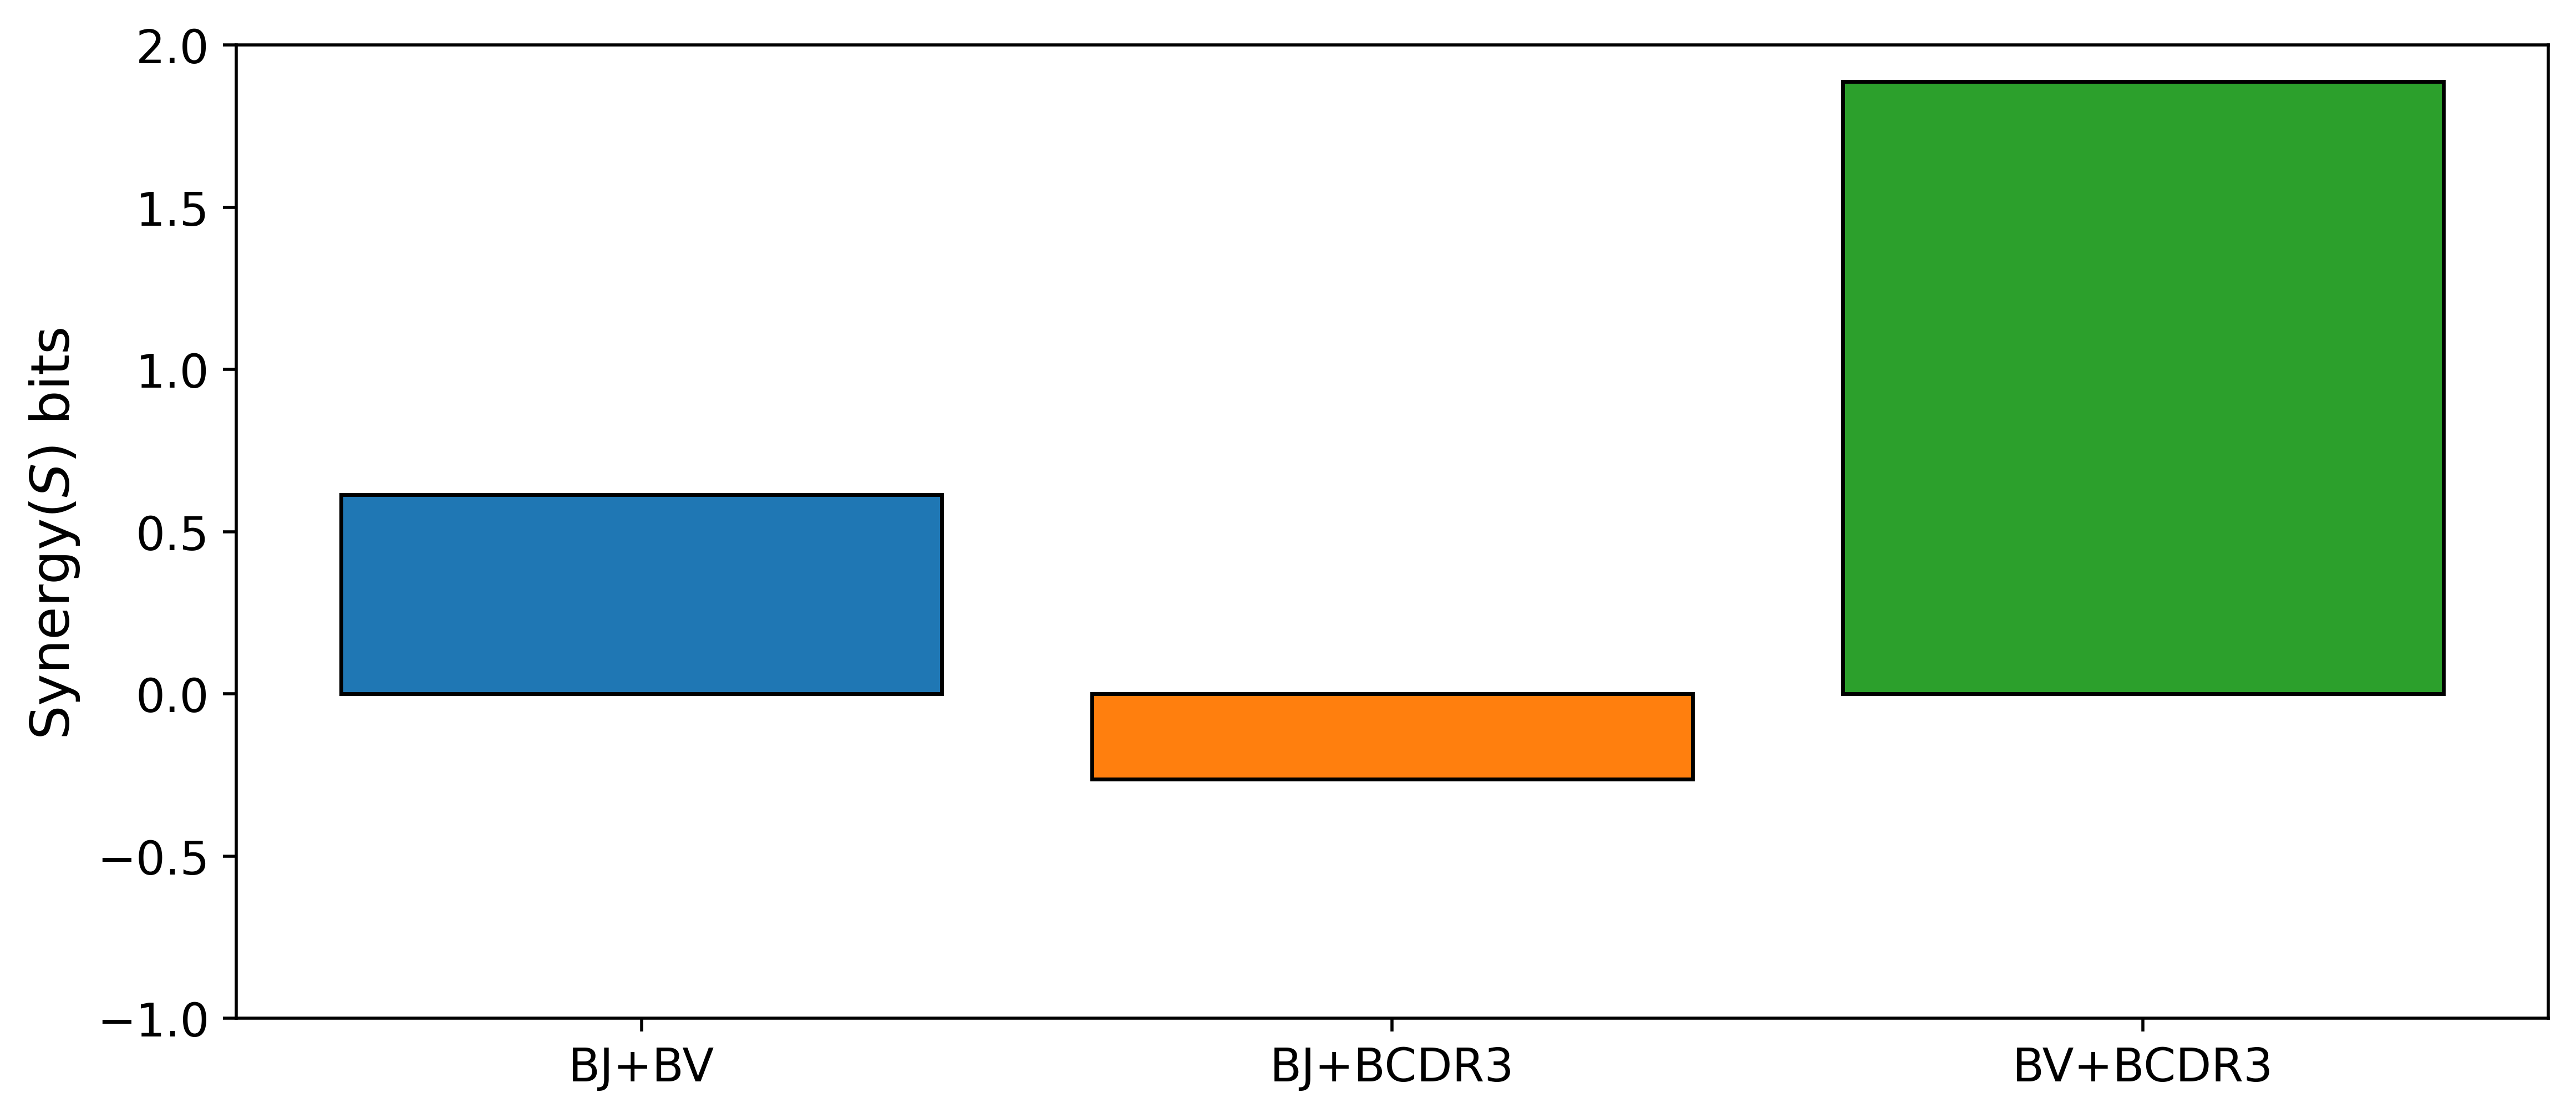

In [39]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("BJ+BV","BJ+BCDR3","BV+BCDR3")
ypos = np.arange(len(bars))

ax.bar(1,syn_vj, edgecolor='black')
ax.bar(2,syn_jcdr3, edgecolor='black')
ax.bar(3,syn_vcdr3, edgecolor='black')

ax.set_ylabel(r'Synergy($S$) bits ')
ax.set_xticks([1,2,3],bars)
ax.set_ylim([-1,2])
plt.savefig('betaSynergy.png');

## Feature redundancy

In [24]:
#Given cdr3
h_vgivencdr3_back = -np.log2(pc_grouped(tanno, "CDR3B", ["TRBV"]))
h_jgivencdr3_back =  -np.log2(pc_grouped(tanno, "CDR3B", ["TRBJ"]))

#Given J
h_vgivenj_back = -np.log2(pc_grouped(tanno, "TRBJ", ["TRBV"]))
h_cdr3givenj_back = -np.log2(pc_grouped(tanno, "TRBJ", ["CDR3B"]))
                             
#Given V   
h_jgivenv_back = -np.log2(pc_grouped(tanno, "TRBV", ["TRBJ"]))
h_cdr3givenv_back = -np.log2(pc_grouped(tanno, "TRBV", ["CDR3B"]))

#Given epitope and cdr3
h_vgivencdr3_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","CDR3B"], ["TRBV"]))
h_jgivencdr3_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","CDR3B"], ["TRBJ"]))                        
    
#Given epitope and V
h_jgivenv_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBV"], ["TRBJ"]))                   
h_cdr3givenv_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBV"], ["CDR3B"]))
                                                 
#Given epitope and J                          
h_vgivenj_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBJ"], ["TRBV"]))   
                          
h_cdr3givenj_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBJ"], ["CDR3B"]))    

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encou

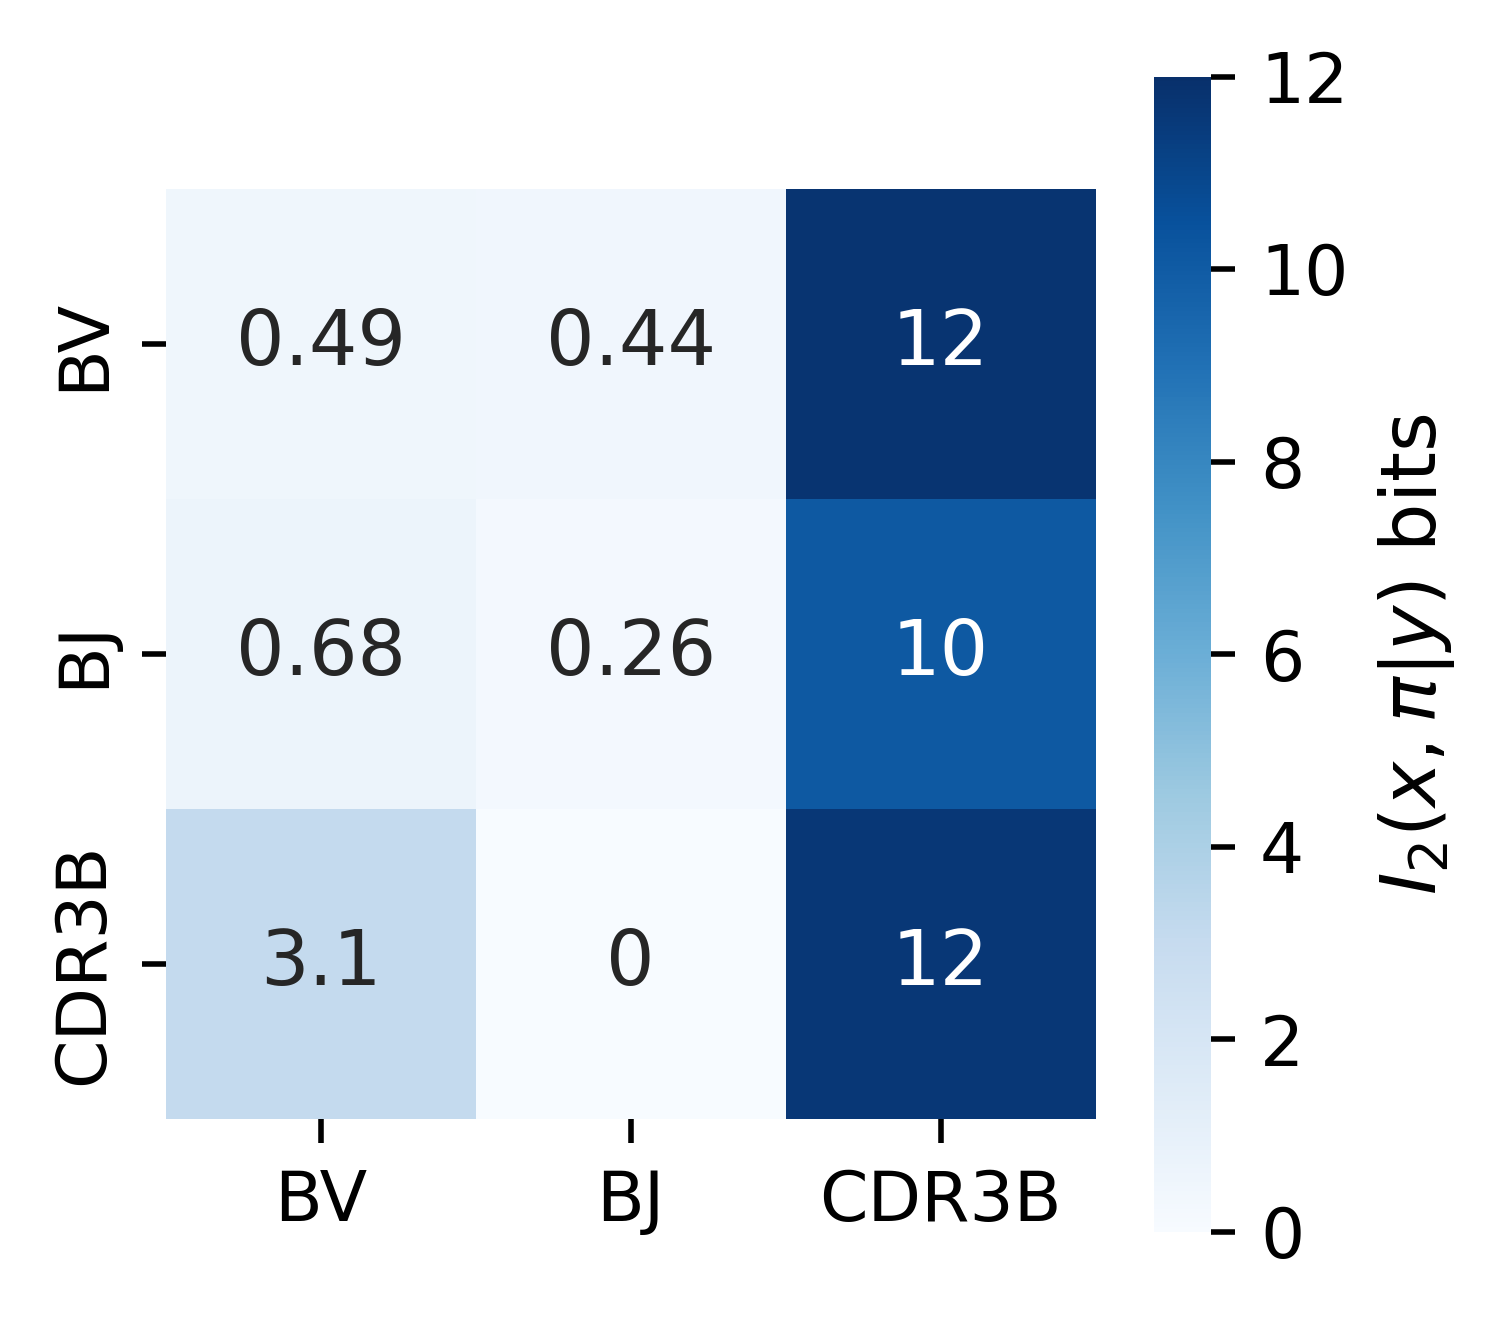

In [28]:
array = np.around([[h_v_back-h_v_spc,h_jgivenv_back-h_jgivenv_spc,h_cdr3givenv_back-h_cdr3givenv_spc],
         [h_vgivenj_back-h_vgivenj_spc, h_j_back-h_j_spc, h_cdr3givenj_back-h_cdr3givenj_spc],
         [h_vgivencdr3_back-h_vgivencdr3_spc, h_jgivencdr3_back-h_jgivencdr3_spc, h_cdr3_back-h_cdr3_spc]
                ], 2)

df_mi = pd.DataFrame(array, index=["BV", "BJ", "CDR3B"], columns=["BV", "BJ", "CDR3B"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x, \pi | y)$ bits'},annot=True,vmin=0,vmax=12)
ax.set_facecolor('xkcd:black')
plt.savefig('betaRedundance.png');

## Mutual information between features

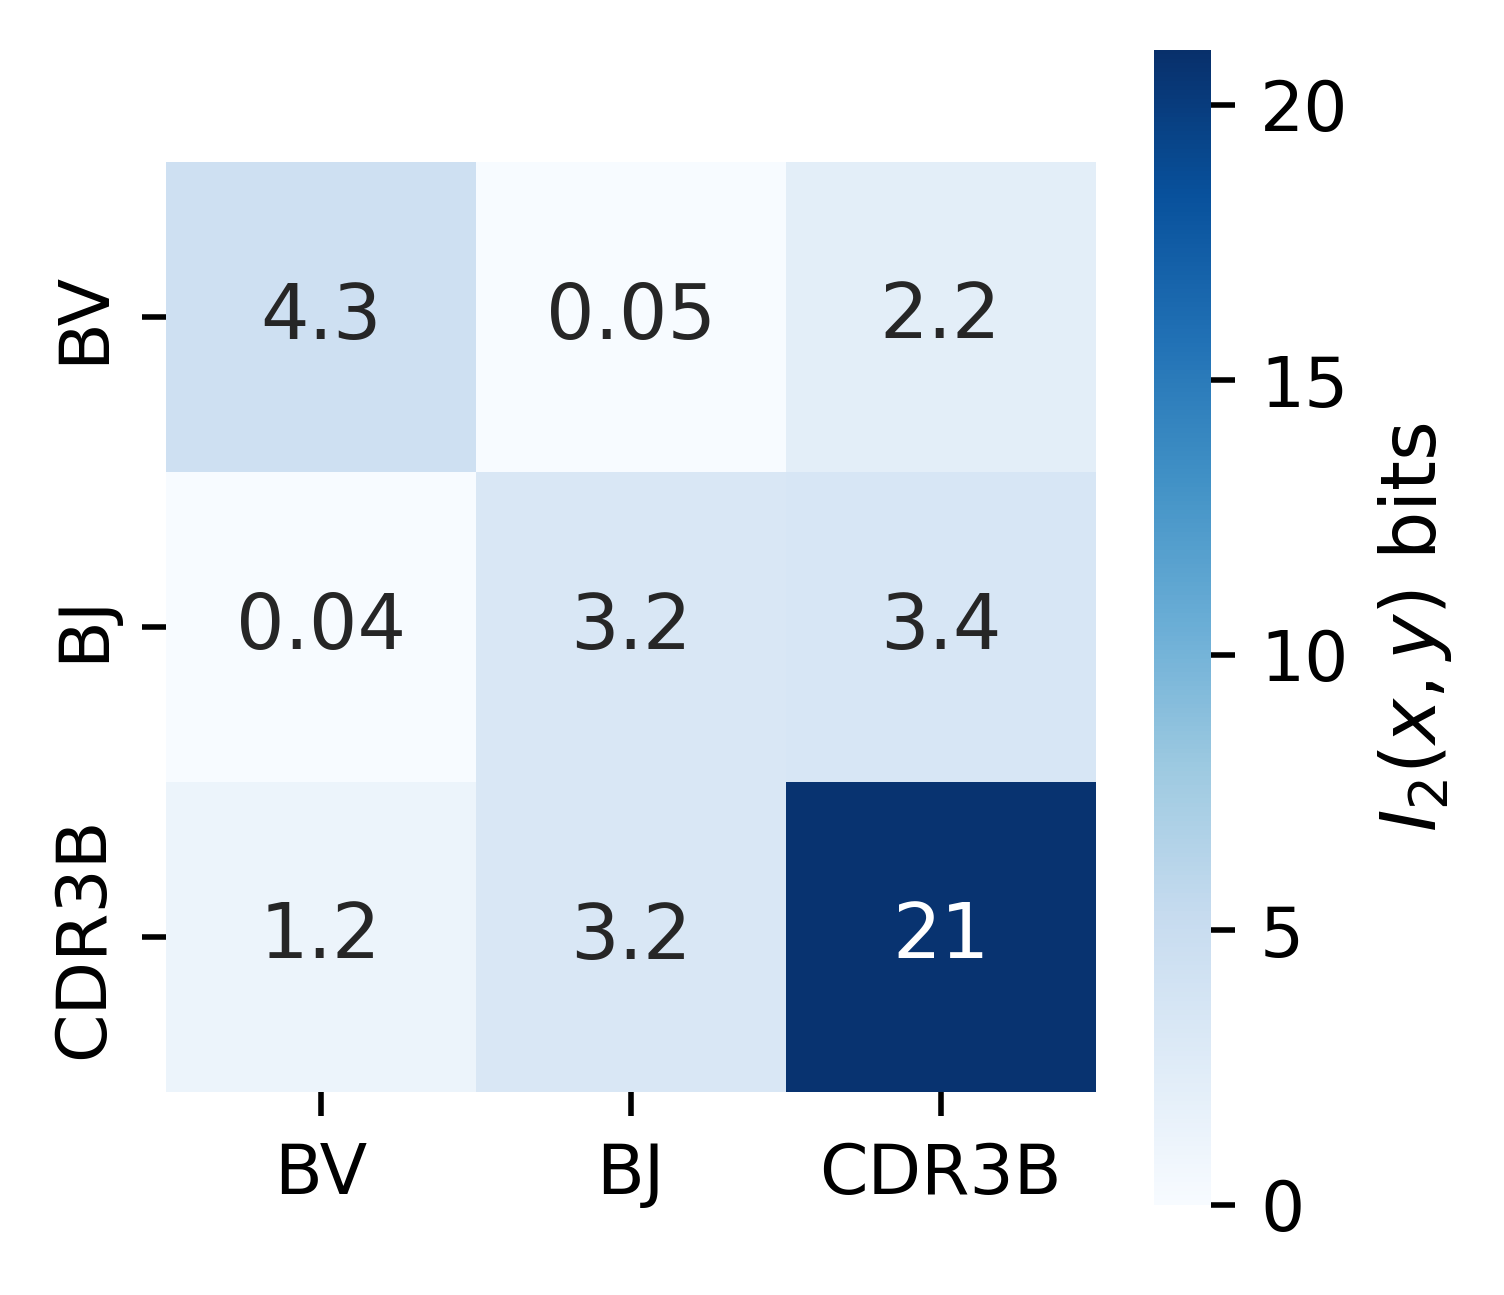

In [32]:
array = np.around([[h_v_back, h_j_back-h_jgivenv_back, h_cdr3_back-h_cdr3givenv_back],
         [h_v_back-h_vgivenj_back, h_j_back, h_cdr3_back-h_cdr3givenj_back],
         [h_v_back-h_vgivencdr3_back,h_j_back-h_jgivencdr3_back,h_cdr3_back]
        ],2)

df_mi_elements = pd.DataFrame(array, index=["BV", "BJ", "CDR3B"], columns=["BV", "BJ", "CDR3B"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi_elements, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x, y)$ bits'},vmin=0, annot=True, vmax=21)
ax.set_facecolor('xkcd:black')
plt.savefig('beta_mutual_information.png');

## Entropy breakdown

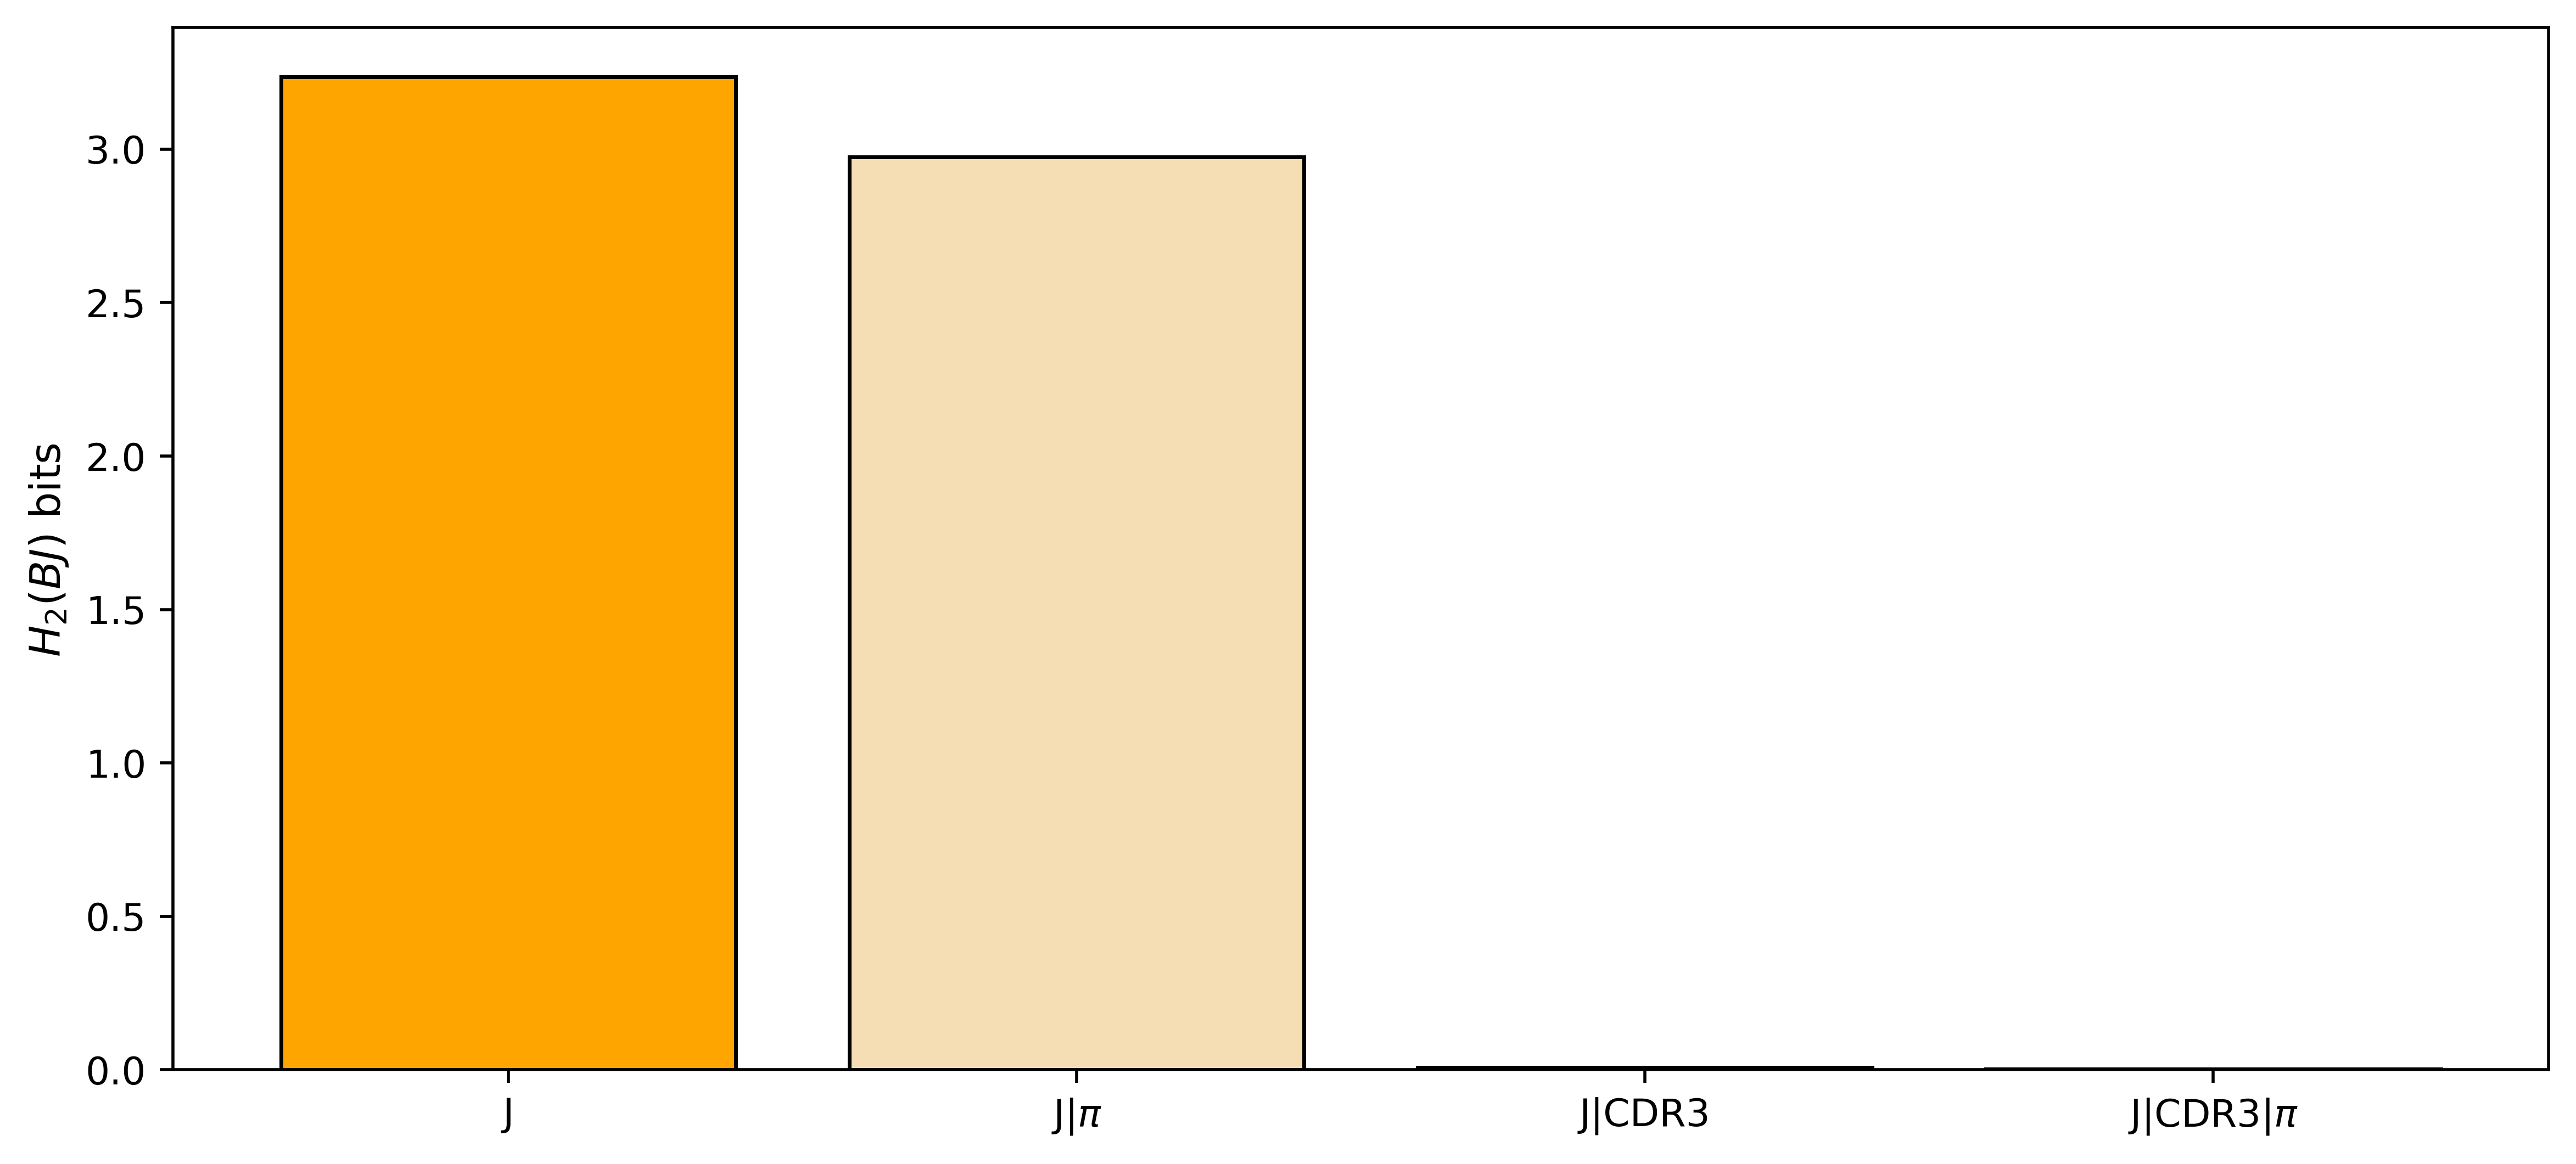

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("J","J|$\pi$","J|CDR3","J|CDR3|$\pi$")
ypos = np.arange(len(bars))

ax.bar(1,h_j_back, edgecolor='black', color='orange')
ax.bar(2,h_j_spc, edgecolor='black', color='wheat')
ax.bar(3,h_jgivencdr3_back, edgecolor='black', color='thistle')
ax.bar(4,h_jgivencdr3_spc, edgecolor='black', color='plum')

ax.set_ylabel(r'$H_2(BJ)$ bits ')
ax.set_xticks([1,2,3,4],bars);

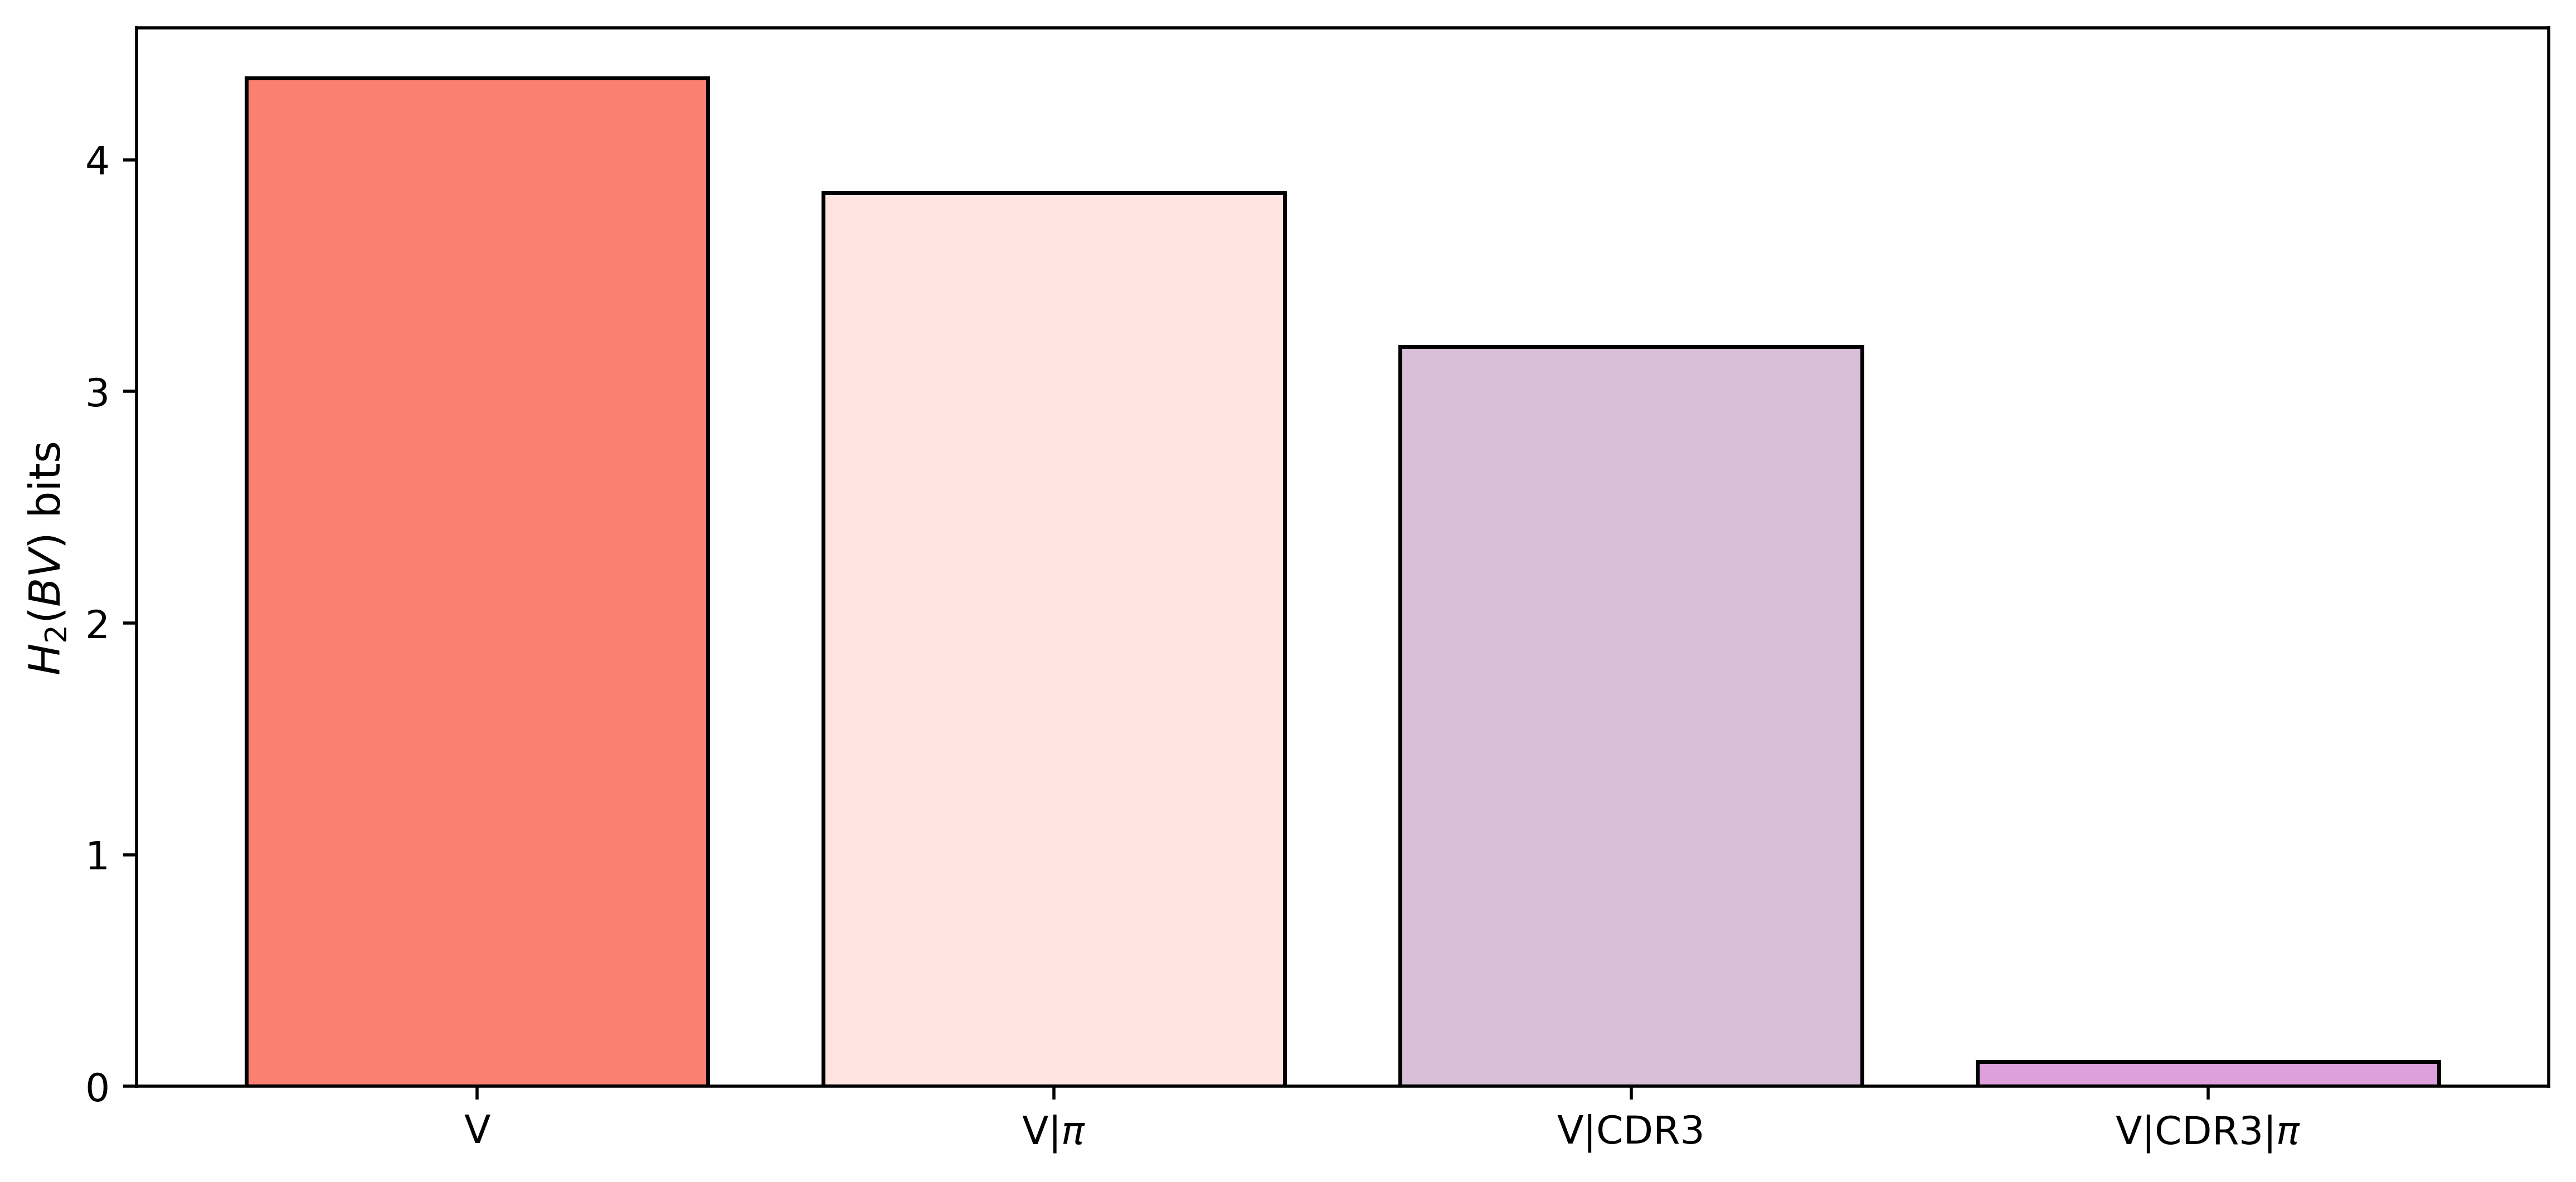

In [14]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("V","V|$\pi$","V|CDR3","V|CDR3|$\pi$",)
ypos = np.arange(len(bars))

ax.bar(1,h_v_back, edgecolor='black', color='salmon')
ax.bar(2,h_v_spc, edgecolor='black', color='mistyrose')
ax.bar(3,h_vgivencdr3_back, edgecolor='black', color='thistle')
ax.bar(4,h_vgivencdr3_spc, edgecolor='black', color='plum')

ax.set_ylabel(r'$H_2(BV)$ bits ')
ax.set_xticks([1,2,3,4],bars);

In [15]:
#Combined v and j for cdr3 
h_cdr3givenvandj_back = -np.log2(pc_grouped(tanno, ["TRBJ","TRBV"], ["CDR3B"]))
h_cdr3givenvandj_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBJ","TRBV"], ["CDR3B"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))


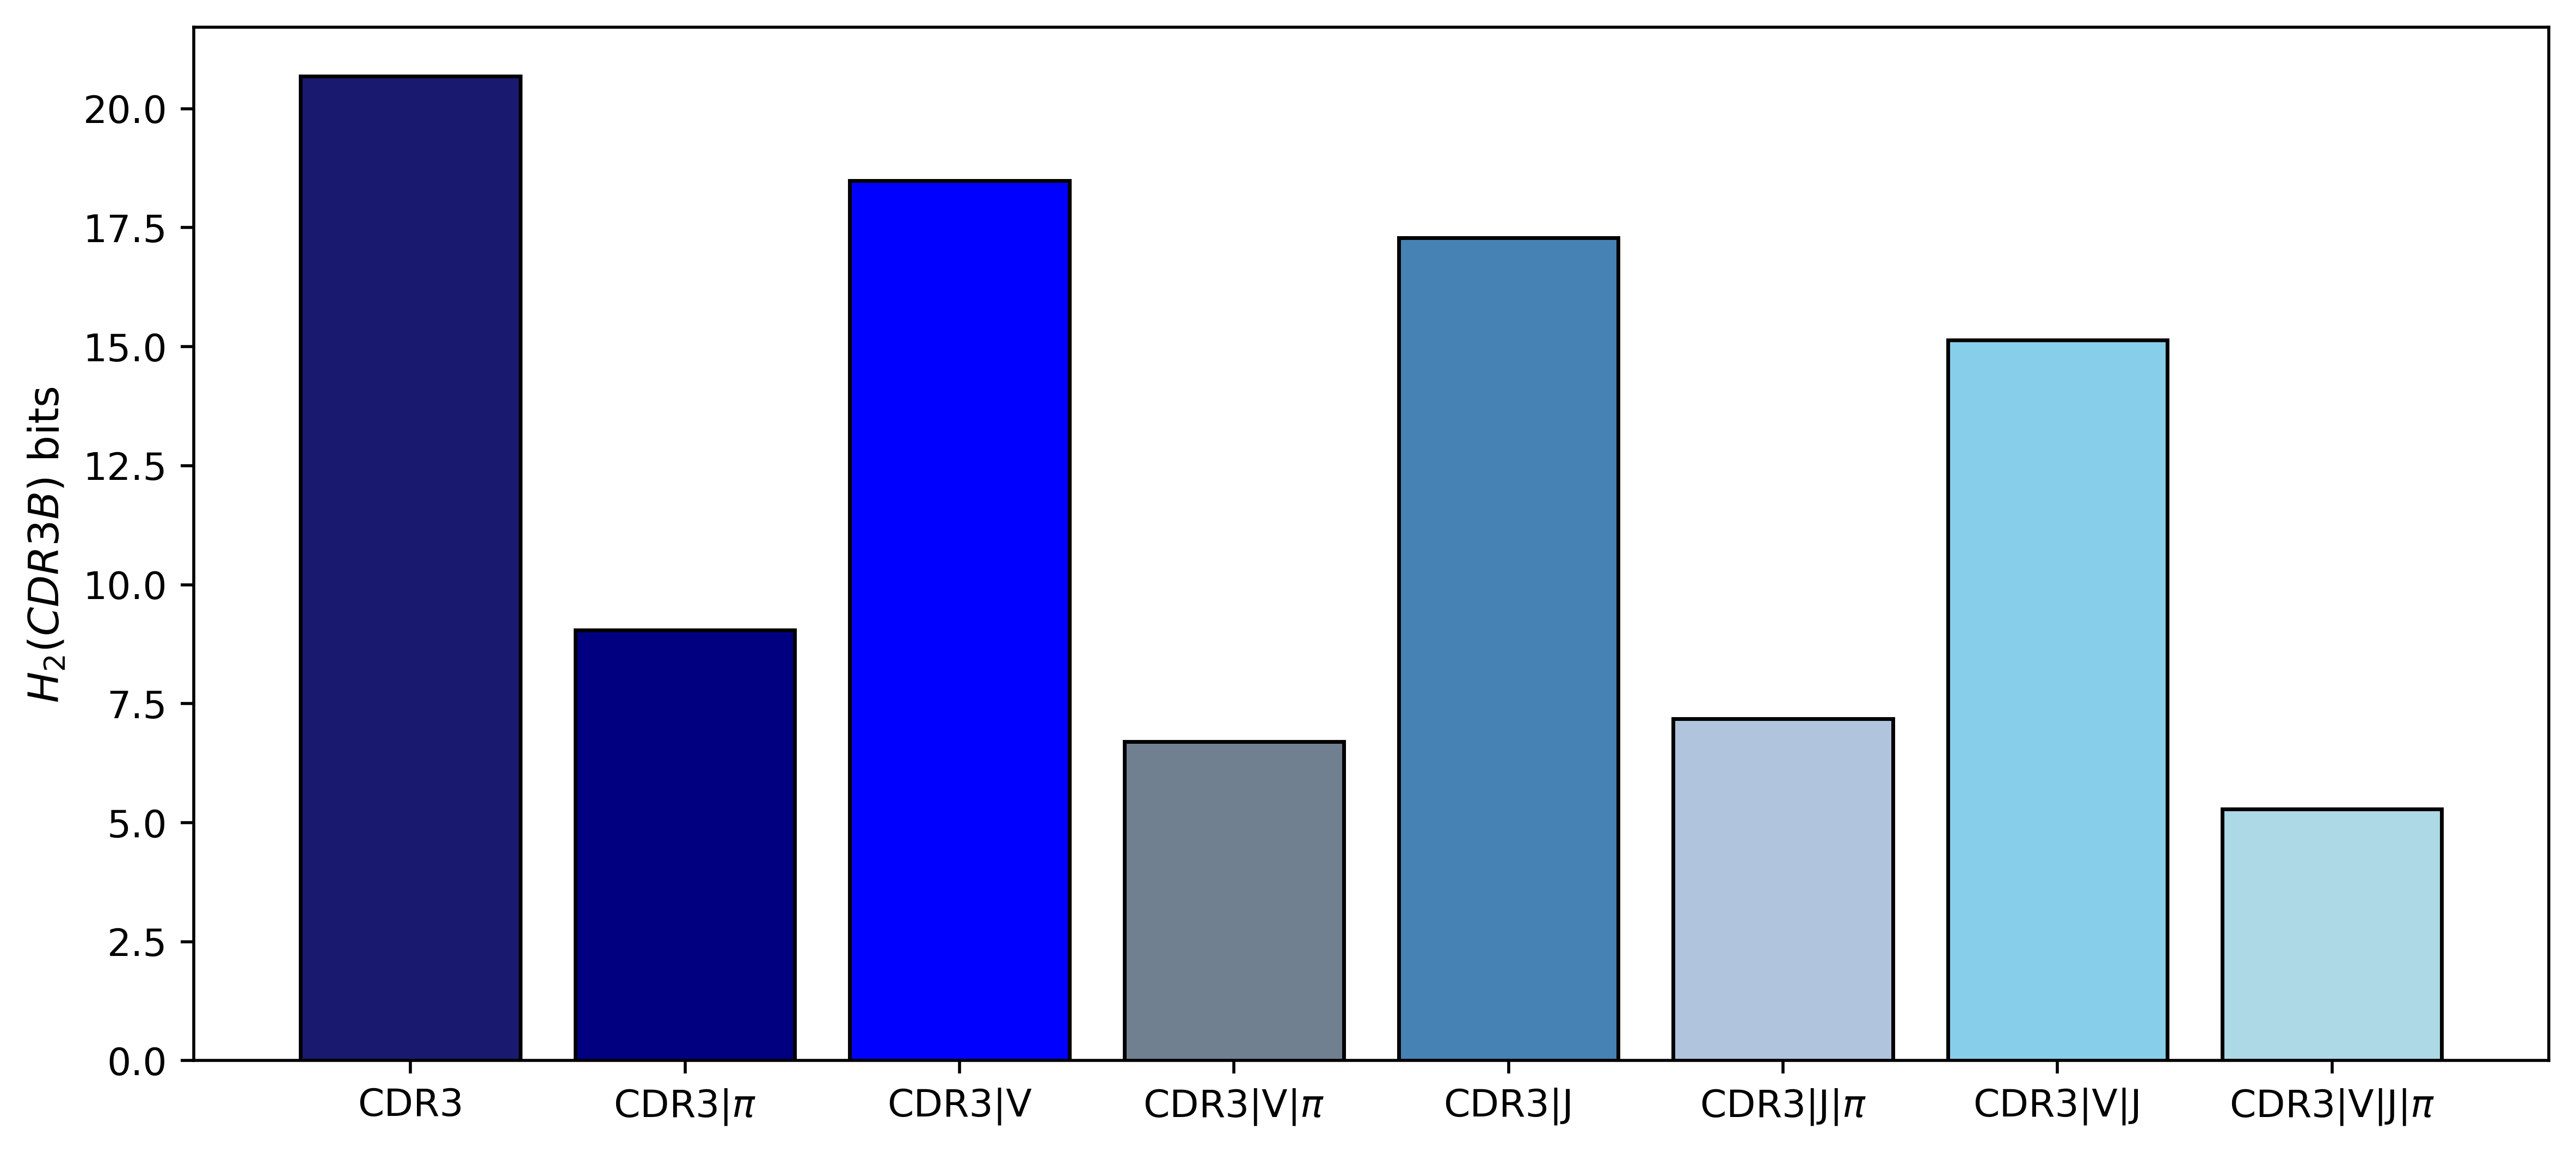

In [16]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("CDR3", "CDR3|$\pi$", "CDR3|V", "CDR3|V|$\pi$",
       "CDR3|J", "CDR3|J|$\pi$","CDR3|V|J","CDR3|V|J|$\pi$")
ypos = np.arange(len(bars))

ax.bar(1,h_cdr3_back, edgecolor='black', color='midnightblue')
ax.bar(2,h_cdr3_spc,edgecolor='black', color='navy')
ax.bar(3,h_cdr3givenv_back, edgecolor='black', color='blue')
ax.bar(4,h_cdr3givenv_spc, edgecolor='black', color='slategrey')
ax.bar(5,h_cdr3givenj_back, edgecolor='black', color='steelblue')
ax.bar(6,h_cdr3givenj_spc, edgecolor='black', color = 'lightsteelblue')
ax.bar(7,h_cdr3givenvandj_back, edgecolor='black', color='skyblue')
ax.bar(8,h_cdr3givenvandj_spc, edgecolor='black', color='lightblue')

ax.set_ylabel(r'$H_2(CDR3B)$ bits ')
ax.set_xticks([1,2,3,4,5,6,7,8],bars);